In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
data = pd.read_csv('Data.csv')
data.head()

,Floor_flat,Price
0,1.1,69.33
1,1.3,66.25
2,1.5,67.71
3,2.0,53.52
4,2.2,39.81


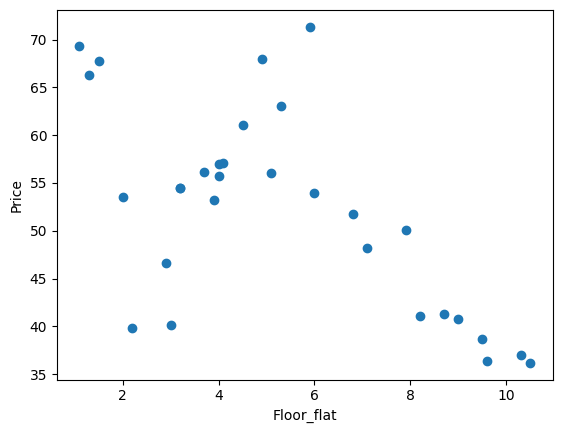

In [3]:
X = data['Floor_flat']
y = data['Price']

# plot data
plt.scatter(X, y)
plt.xlabel('Floor_flat')
plt.ylabel('Price')
plt.show()

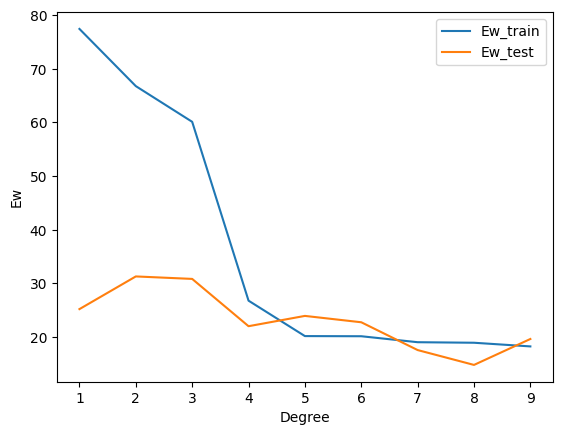

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ew_train, Ew_test = [], []
models = []
for i in range(1, 10):
    model = np.poly1d(np.polyfit(X_train, y_train, i))
    Ew_train.append(np.mean((model(X_train) - y_train) ** 2))
    Ew_test.append(np.mean((model(X_test) - y_test) ** 2))
    models.append(model)

plt.plot(range(1, 10), Ew_train, label='Ew_train')
plt.plot(range(1, 10), Ew_test, label='Ew_test')
plt.xlabel('Degree')
plt.ylabel('Ew')
plt.legend()
plt.show()


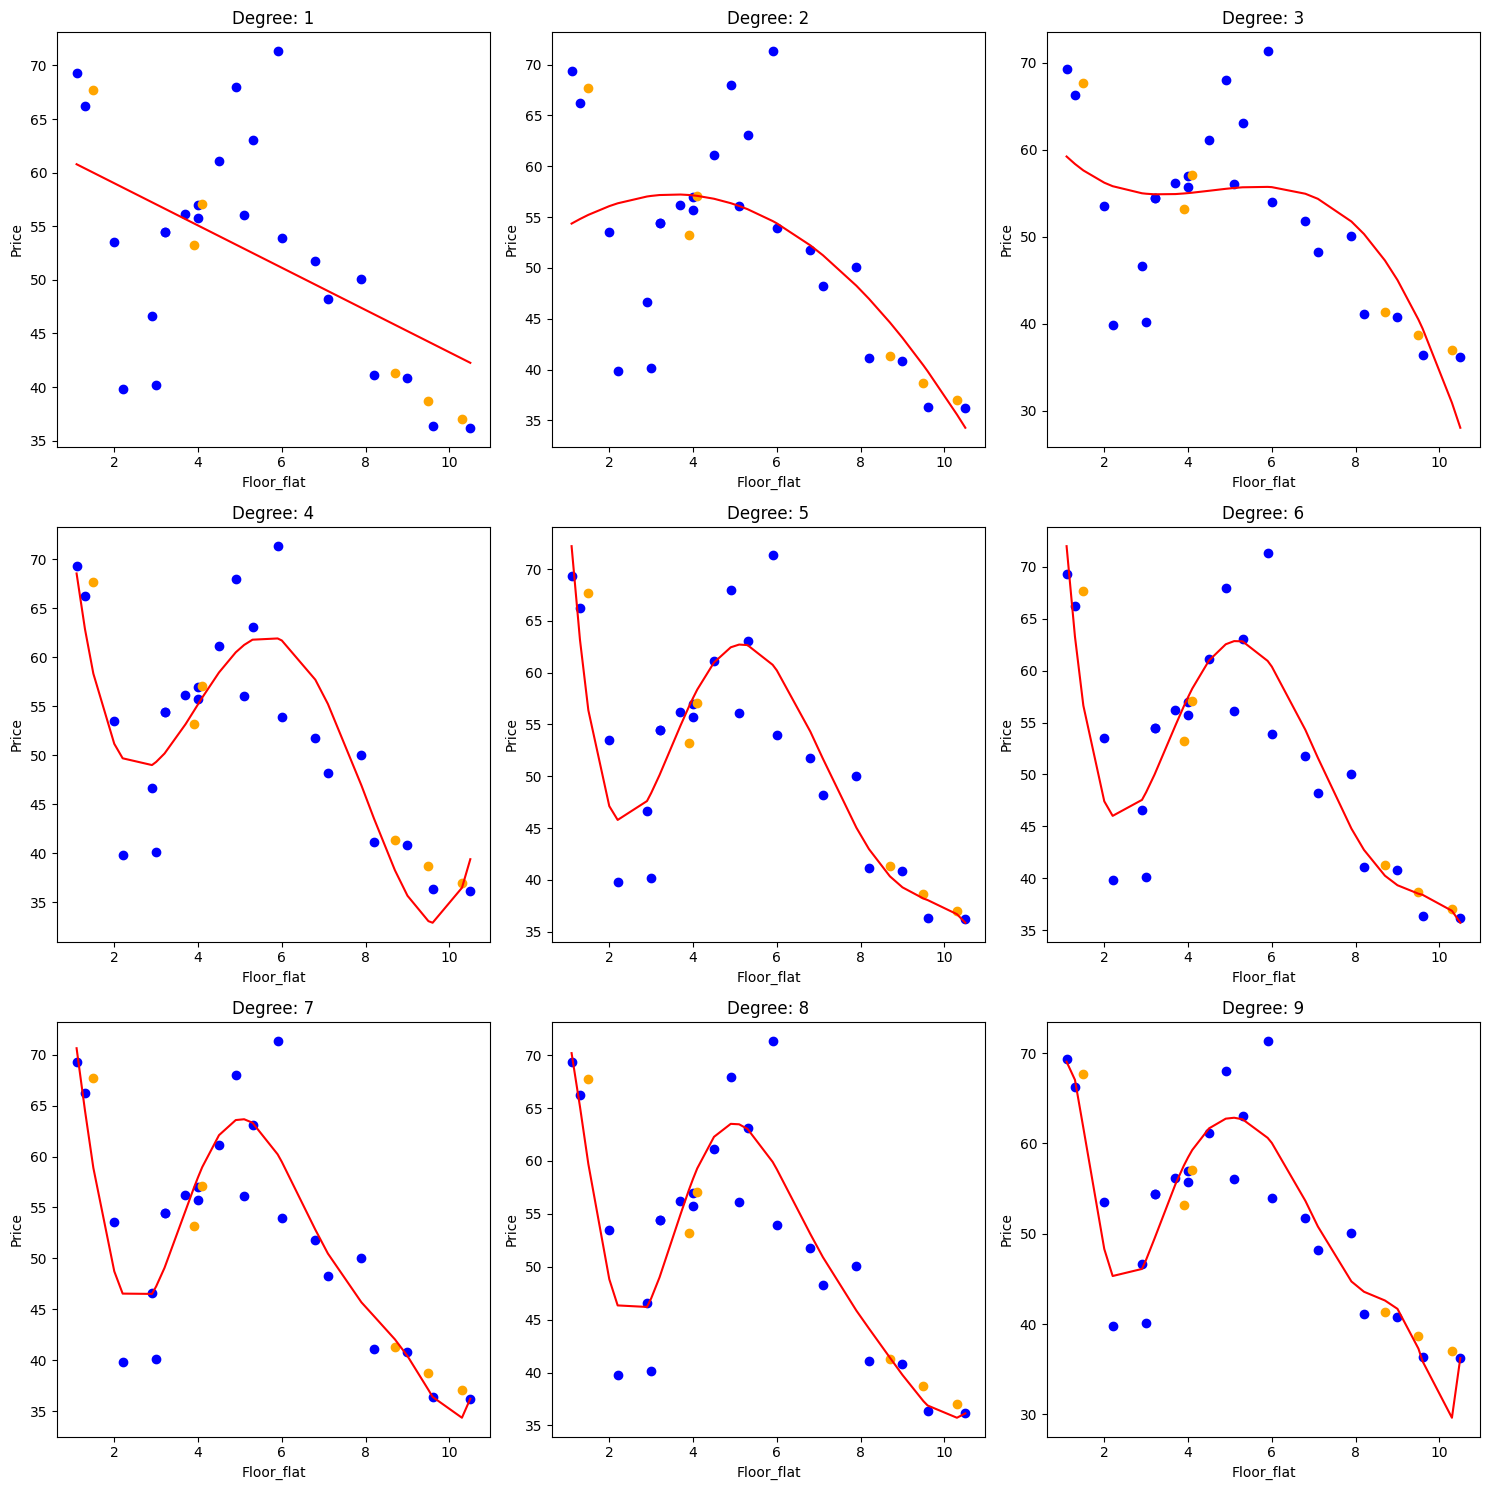

In [5]:

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(X_train, y_train, c='blue')
        axs[i, j].scatter(X_test, y_test, c='orange')
        axs[i, j].plot(X, models[i * 3 + j](X), c='red')
        axs[i, j].set_title('Degree: {}'.format(i * 3 + j + 1))
        axs[i, j].set_xlabel('Floor_flat')
        axs[i, j].set_ylabel('Price')
fig.tight_layout()
plt.show()